In [271]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn

# white | dark | whitegrid | darkgrid | ticks
# seaborn.set_style("whitegrid")  

In [272]:
hom = pandas.read_csv("ejemplo_hom.csv")

hom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Abreviatura  31 non-null     object
 1   Hombres      32 non-null     int64 
 2   Mujeres      32 non-null     int64 
 3   Estado       32 non-null     object
 4   No_esp       32 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.4+ KB


In [273]:
hom.head()

,Abreviatura,Hombres,Mujeres,Estado,No_esp
0,AG,73,13,Aguascalientes,1
1,BC,2279,291,Baja California,111
2,BS,74,15,Baja California Sur,0
3,CM,95,13,Campeche,2
4,CO,143,26,Coahuila de Zaragoza,0


In [274]:
hom[["Abreviatura", "Estado"]]

,Abreviatura,Estado
0,AG,Aguascalientes
1,BC,Baja California
2,BS,Baja California Sur
3,CM,Campeche
4,CO,Coahuila de Zaragoza
5,CL,Colima
6,CS,Chiapas
7,CH,Chihuahua
8,CX,CDMX
9,DG,Durango


In [275]:
hom["Region"] = ['Noreste', 'Noroeste', 'Noroeste', 'Sureste', 'Noreste',
                 'Occidente', 'Sureste', 'Noroeste', 'Centro-Sur', 'Noroeste',
                 'Noreste', 'Centro-Sur', 'Occidente', 'Noroeste', 'Occidente',
                 'Occidente', 'Centro-Sur', 'Noroeste', 'Noreste', 'Sureste',
                 'Centro-Sur', 'Noreste', 'Sureste', 'Noreste', 'Noroeste',
                 'Noroeste', 'Sureste', 'Noreste', 'Centro-Sur', 'Sureste',
                 'Sureste', 'Noreste']

hom.head()

,Abreviatura,Hombres,Mujeres,Estado,No_esp,Region
0,AG,73,13,Aguascalientes,1,Noreste
1,BC,2279,291,Baja California,111,Noroeste
2,BS,74,15,Baja California Sur,0,Noroeste
3,CM,95,13,Campeche,2,Sureste
4,CO,143,26,Coahuila de Zaragoza,0,Noreste


In [276]:
hom["Total"] = hom["Hombres"] + hom["Mujeres"] + hom["No_esp"]

hom.head()

,Abreviatura,Hombres,Mujeres,Estado,No_esp,Region,Total
0,AG,73,13,Aguascalientes,1,Noreste,87
1,BC,2279,291,Baja California,111,Noroeste,2681
2,BS,74,15,Baja California Sur,0,Noroeste,89
3,CM,95,13,Campeche,2,Sureste,110
4,CO,143,26,Coahuila de Zaragoza,0,Noreste,169


In [277]:
hom = hom[["Estado", "Abreviatura", "Region", "Mujeres", "Hombres", "No_esp", "Total"]]

hom.head()

,Estado,Abreviatura,Region,Mujeres,Hombres,No_esp,Total
0,Aguascalientes,AG,Noreste,13,73,1,87
1,Baja California,BC,Noroeste,291,2279,111,2681
2,Baja California Sur,BS,Noroeste,15,74,0,89
3,Campeche,CM,Sureste,13,95,2,110
4,Coahuila de Zaragoza,CO,Noreste,26,143,0,169


In [278]:
del hom["Abreviatura"]

hom.head()

,Estado,Region,Mujeres,Hombres,No_esp,Total
0,Aguascalientes,Noreste,13,73,1,87
1,Baja California,Noroeste,291,2279,111,2681
2,Baja California Sur,Noroeste,15,74,0,89
3,Campeche,Sureste,13,95,2,110
4,Coahuila de Zaragoza,Noreste,26,143,0,169


In [279]:
hom.iloc[15:25]

,Estado,Region,Mujeres,Hombres,No_esp,Total
15,Michoacan,Occidente,241,2044,7,2292
16,Morelos,Centro-Sur,109,1040,0,1149
17,Nayarit,Noroeste,16,169,1,186
18,Nuevo Leon,Noreste,150,1240,1,1391
19,Oaxaca,Sureste,114,626,0,740
20,Puebla,Centro-Sur,123,923,15,1061
21,Queretaro,Noreste,26,161,0,187
22,Quintana Roo,Sureste,62,573,0,635
23,San Luis Potosi,Noreste,62,687,2,751
24,Sinaloa,Noroeste,37,515,6,558


In [280]:
reporte1 = hom[["Region", "Mujeres", "Hombres"]].groupby("Region").sum()

reporte1

,Mujeres,Hombres
Region,,
Centro-Sur,486,3962
Noreste,1061,7346
Noroeste,966,8073
Occidente,898,5838
Sureste,389,2620


<Axes: ylabel='Region'>

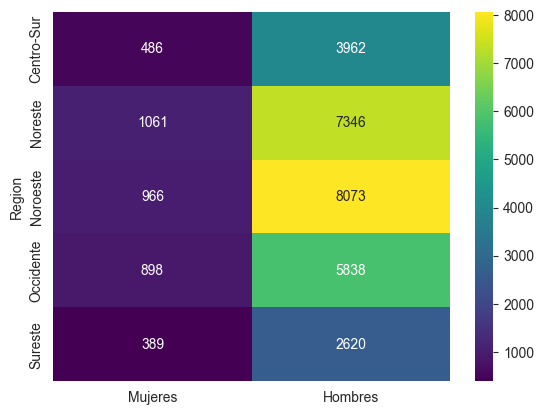

In [281]:
seaborn.heatmap(reporte1, cmap="viridis", annot=True, fmt=".0f")

In [282]:
reporte2 = reporte1.div(reporte1.sum(axis=1), axis=0)

reporte2

,Mujeres,Hombres
Region,,
Centro-Sur,0.109263,0.890737
Noreste,0.126204,0.873796
Noroeste,0.106870,0.893130
Occidente,0.133314,0.866686
Sureste,0.129279,0.870721


<Axes: ylabel='Region'>

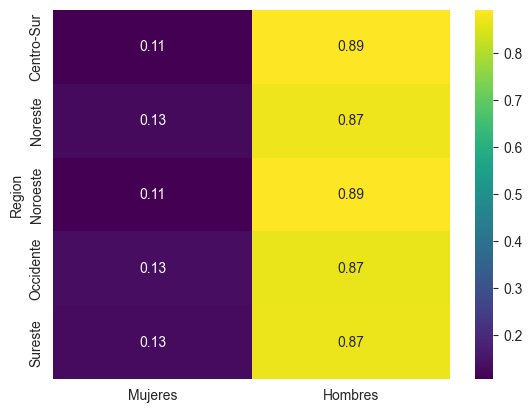

In [283]:
seaborn.heatmap(reporte2, cmap="viridis", annot=True, fmt=".2f")

In [284]:
reporte3 = reporte1.div(reporte1.sum(axis=0), axis=1)

reporte3

,Mujeres,Hombres
Region,,
Centro-Sur,0.127895,0.142318
Noreste,0.279211,0.263874
Noroeste,0.254211,0.289989
Occidente,0.236316,0.209706
Sureste,0.102368,0.094113


<Axes: ylabel='Region'>

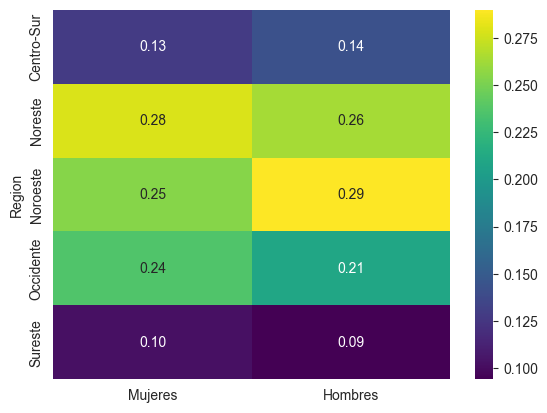

In [285]:
seaborn.heatmap(reporte3, cmap="viridis", annot=True, fmt=".2f")

In [286]:
hom2023 = pandas.read_csv("homicidios_2023.csv")

hom2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Estado       32 non-null     object
 1   Abreviatura  31 non-null     object
 2   Regiones     32 non-null     object
 3   Mujeres      32 non-null     int64 
 4   Hombres      32 non-null     int64 
 5   No_esp       32 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.6+ KB


In [287]:
hom2023["Total"] = hom2023["Hombres"] + hom2023["Mujeres"] + hom2023["No_esp"]

hom2023.set_index("Estado")

hom2023["Total"].sum()

np.int64(31355)

In [288]:
def homicidiosTotalesAnual(anio):
    homicidiosAnual = pandas.read_csv(f"homicidios_{anio}.csv")
    homicidiosAnual["Total"] = homicidiosAnual["Hombres"] + homicidiosAnual["Mujeres"] + homicidiosAnual["No_esp"]
    homicidiosAnual.set_index("Estado")
    return homicidiosAnual["Total"].sum()

In [289]:
homicidios = pandas.Series([homicidiosTotalesAnual(anio) for anio in range(2017, 2024)])

homicidios

0    32079
1    36685
2    36661
3    36773
4    35700
5    32223
6    31355
dtype: int64

<Axes: >

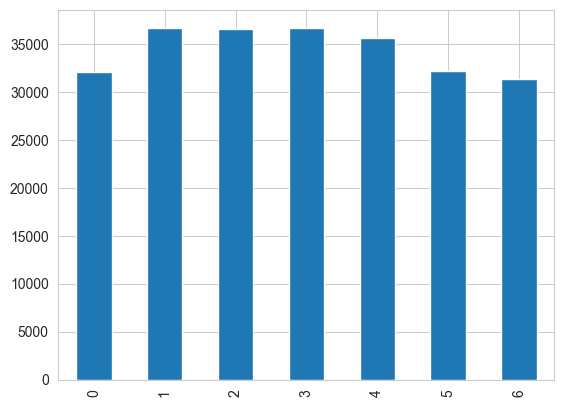

In [290]:
homicidios.plot.bar()

In [291]:
hom2023.sort_values(by="Total", ascending=False)

,Estado,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
10,Guanajuato,GT,Noreste,555,3295,9,3859
14,Mexico,EM,Occidente,409,2497,24,2930
1,Baja California,BC,Noroeste,289,2225,51,2565
7,Chihuahua,CH,Noroeste,262,1894,0,2156
15,Michoacan,MI,Occidente,183,1659,9,1851
13,Jalisco,JC,Noroeste,176,1566,10,1752
11,Guerrero,GR,Centro-Sur,158,1563,4,1725
16,Morelos,MO,Centro-Sur,157,1394,0,1551
25,Sonora,SO,Noroeste,149,1308,26,1483
18,Nuevo Leon,NL,Noreste,164,1238,1,1403


In [292]:
hom2023[hom2023["Regiones"] == "Noroeste"]

,Estado,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
1,Baja California,BC,Noroeste,289,2225,51,2565
2,Baja California Sur,BS,Noroeste,7,41,0,48
7,Chihuahua,CH,Noroeste,262,1894,0,2156
9,Durango,DG,Noroeste,15,80,0,95
13,Jalisco,JC,Noroeste,176,1566,10,1752
17,Nayarit,NaN,Noroeste,18,127,2,147
24,Sinaloa,SI,Noroeste,47,588,14,649
25,Sonora,SO,Noroeste,149,1308,26,1483


In [293]:
hom2023[hom2023["Regiones"] == "Noroeste"]["Total"].sum()

np.int64(8895)

In [294]:
hom2023.head()

,Estado,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
0,Aguascalientes,AG,Noreste,14,90,1,105
1,Baja California,BC,Noroeste,289,2225,51,2565
2,Baja California Sur,BS,Noroeste,7,41,0,48
3,Campeche,CM,Sureste,15,89,0,104
4,Coahuila de Zaragoza,CO,Noreste,16,100,0,116


In [295]:
hom2023 = hom2023.set_index("Estado")

hom2023.head()

,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
Estado,,,,,,
Aguascalientes,AG,Noreste,14,90,1,105
Baja California,BC,Noroeste,289,2225,51,2565
Baja California Sur,BS,Noroeste,7,41,0,48
Campeche,CM,Sureste,15,89,0,104
Coahuila de Zaragoza,CO,Noreste,16,100,0,116


In [296]:
hom2023.index

Index([' Aguascalientes', ' Baja California', ' Baja California Sur',
       ' Campeche', ' Coahuila de Zaragoza', ' Colima', ' Chiapas',
       ' Chihuahua', ' CDMX', ' Durango', ' Guanajuato', ' Guerrero',
       ' Hidalgo', ' Jalisco', ' Mexico', ' Michoacan', ' Morelos', ' Nayarit',
       ' Nuevo Leon', ' Oaxaca', ' Puebla', ' Queretaro', ' Quintana Roo',
       ' San Luis Potosi', ' Sinaloa', ' Sonora', ' Tabasco', ' Tamaulipas',
       ' Tlaxcala', ' Veracruz', ' Yucatan', ' Zacatecas'],
      dtype='object', name='Estado')

In [297]:
hom2023.drop(index=[" Aguascalientes", " Campeche"])

,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
Estado,,,,,,
Baja California,BC,Noroeste,289,2225,51,2565
Baja California Sur,BS,Noroeste,7,41,0,48
Coahuila de Zaragoza,CO,Noreste,16,100,0,116
Colima,CL,Occidente,128,720,1,849
Chiapas,CS,Sureste,64,557,6,627
Chihuahua,CH,Noroeste,262,1894,0,2156
CDMX,CX,Centro-Sur,90,654,0,744
Durango,DG,Noroeste,15,80,0,95
Guanajuato,GT,Noreste,555,3295,9,3859


In [298]:
hom2023.loc[" Mexico":" Tabasco"]

,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
Estado,,,,,,
Mexico,EM,Occidente,409,2497,24,2930
Michoacan,MI,Occidente,183,1659,9,1851
Morelos,MO,Centro-Sur,157,1394,0,1551
Nayarit,NaN,Noroeste,18,127,2,147
Nuevo Leon,NL,Noreste,164,1238,1,1403
Oaxaca,OA,Sureste,95,736,0,831
Puebla,PU,Centro-Sur,106,882,4,992
Queretaro,QT,Noreste,31,196,0,227
Quintana Roo,QR,Sureste,67,635,0,702


In [299]:
poblacion = pandas.read_csv("poblacion.csv")

poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Estado    32 non-null     object
 1   Regiones  32 non-null     object
 2   H_1990    32 non-null     int64 
 3   M_1990    32 non-null     int64 
 4   H_2000    32 non-null     int64 
 5   M_2000    32 non-null     int64 
 6   H_2010    32 non-null     int64 
 7   M_2010    32 non-null     int64 
 8   H_2020    32 non-null     int64 
 9   M_2020    32 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.6+ KB


In [300]:
poblacion.head()

,Estado,Regiones,H_1990,M_1990,H_2000,M_2000,H_2010,M_2010,H_2020,M_2020
0,Aguascalientes,Noreste,350218,369441,456533,487752,576638,608358,696683,728924
1,Baja California,Noroeste,832090,828765,1252581,1234786,1591610,1563460,1900589,1868431
2,Baja California Sur,Noroeste,161833,155931,216250,207791,325433,311593,405879,392568
3,Campeche,Sureste,268772,266413,344334,346355,407721,414720,456939,471424
4,Coahuila de Zaragoza,Noreste,979097,993243,1140195,1157875,1364197,1384194,1563669,1583102


In [301]:
anios = poblacion.columns[
    poblacion.columns.map(lambda columna: str(columna)[0] == "H")
].map(lambda columna: columna.replace("H_", ""))

print(anios)

for anio in anios:
    poblacion[f"{anio}"] = poblacion[f"H_{anio}"] + poblacion[f"M_{anio}"]

print(poblacion.columns)

print(poblacion.columns[
    poblacion.columns.map(lambda columna: "_" in str(columna))
])

poblacion = poblacion.drop(poblacion.columns[
    poblacion.columns.map(lambda columna: "_" in str(columna))
], axis=1)

poblacion.head()

Index(['1990', '2000', '2010', '2020'], dtype='object')
Index(['Estado', 'Regiones', 'H_1990', 'M_1990', 'H_2000', 'M_2000', 'H_2010',
       'M_2010', 'H_2020', 'M_2020', '1990', '2000', '2010', '2020'],
      dtype='object')
Index(['H_1990', 'M_1990', 'H_2000', 'M_2000', 'H_2010', 'M_2010', 'H_2020',
       'M_2020'],
      dtype='object')


,Estado,Regiones,1990,2000,2010,2020
0,Aguascalientes,Noreste,719659,944285,1184996,1425607
1,Baja California,Noroeste,1660855,2487367,3155070,3769020
2,Baja California Sur,Noroeste,317764,424041,637026,798447
3,Campeche,Sureste,535185,690689,822441,928363
4,Coahuila de Zaragoza,Noreste,1972340,2298070,2748391,3146771


In [302]:
F = []
C = []

for anio in anios:
    F.append(anio)
    C.append(poblacion[f"{anio}"].sum())

pob = pandas.DataFrame({
    "Poblacion": C
}, index=F)

pob

,Poblacion
1990,81249645
2000,97483412
2010,112336538
2020,126014024


<Axes: >

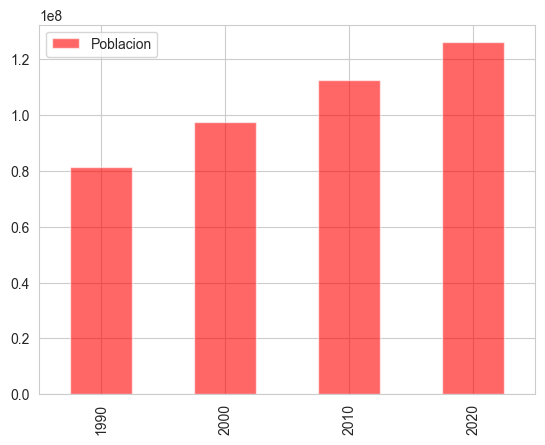

In [ ]:
pob.plot.bar(color="red", alpha=0.6)